### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [40]:
data = pd.read_csv('data/coupons.csv')

In [41]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [42]:

missing_data = data.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing_data[missing_data > 0])


duplicate_count = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


print("\nUnique values in each column (to spot problematic entries):\n")
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"{col}: {data[col].unique()}\n")

Missing values per column:
car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
dtype: int64

Number of duplicate rows: 74

Unique values in each column (to spot problematic entries):

destination: ['No Urgent Place' 'Home' 'Work']

passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

weather: ['Sunny' 'Rainy' 'Snowy']

time: ['2PM' '10AM' '6PM' '7AM' '10PM']

coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

expiration: ['1d' '2h']

gender: ['Female' 'Male']

age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

occupation: ['Unemployed' 'Architecture & Engineering' 

3. Decide what to do about your missing data -- drop, replace, other...

## After investigating the dataset:

- The `car` column contains a large number of missing values (over 12,000) and provides little value to the analysis, so the decision is to **drop** the column entirely.
- For columns like `Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20`, and `Restaurant20To50`, missing values are relatively few (~100–200 rows). Since these columns represent important behavioral patterns, we decided to **drop rows** with missing values in these columns instead of trying to fill them in.
- Duplicate rows (~74 found) would be removed to avoid bias in analysis.

No changes are applied yet—this is only a decision summary.

4. What proportion of the total observations chose to accept the coupon?



In [43]:
total = data.shape[0]

accepted = data['Y'].sum()

proportion = accepted / total

print(f"Total observations: {total}")
print(f"Accepted coupon (Y=1): {accepted}")
print(f"Proportion who accepted the coupon: {proportion:.2%}")

Total observations: 12684
Accepted coupon (Y=1): 7210
Proportion who accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

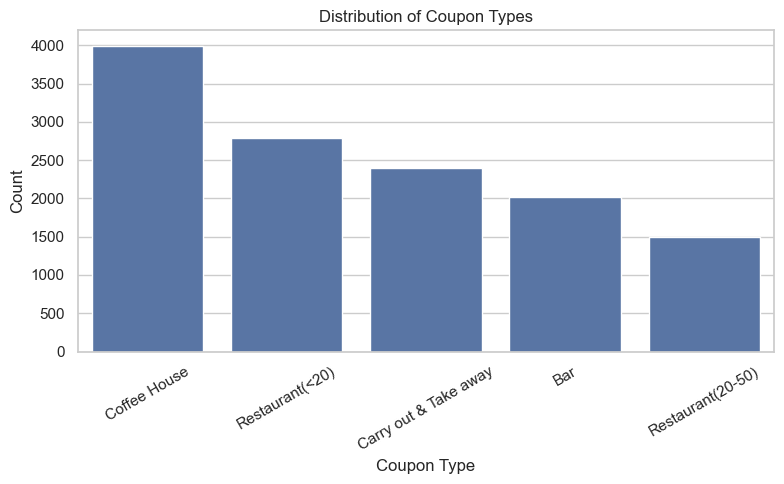

In [44]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index)
plt.title("Distribution of Coupon Types")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

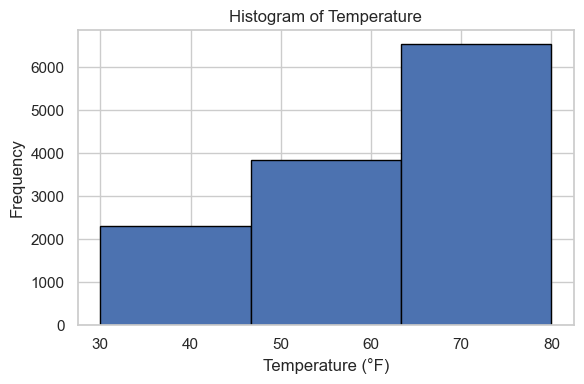

In [45]:

plt.figure(figsize=(6,4))
plt.hist(data['temperature'], bins=3, edgecolor='black')
plt.title("Histogram of Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [46]:
bar_data = data[data['coupon'] == 'Bar']

print(f"Number of bar coupon records: {bar_data.shape[0]}")

bar_data.head()

Number of bar coupon records: 2017


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [47]:
total_bar = bar_data.shape[0]

accepted_bar = bar_data['Y'].sum()

bar_acceptance_rate = accepted_bar / total_bar

print(f"Total bar coupons: {total_bar}")
print(f"Accepted bar coupons (Y=1): {accepted_bar}")
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2%}")


Total bar coupons: 2017
Accepted bar coupons (Y=1): 827
Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [48]:
low_freq = ['never', 'less than 1', '1 to 3']
high_freq = ['4 to 8', 'greater than 8']

low_bar_visits = bar_data[bar_data['Bar'].isin(low_freq)]
high_bar_visits = bar_data[bar_data['Bar'].isin(high_freq)]

if low_bar_visits.shape[0] > 0:
    low_accept = low_bar_visits['Y'].sum() / low_bar_visits.shape[0]
else:
    low_accept = None

if high_bar_visits.shape[0] > 0:
    high_accept = high_bar_visits['Y'].sum() / high_bar_visits.shape[0]
else:
    high_accept = None

print(f"Low-frequency bar visitors (≤ 3/month): {low_accept:.2%}" if low_accept is not None else "No data for low-frequency visitors.")
print(f"High-frequency bar visitors (> 3/month): {high_accept:.2%}" if high_accept is not None else "No data for high-frequency visitors.")


Low-frequency bar visitors (≤ 3/month): 18.80%
No data for high-frequency visitors.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [49]:
more_than_once = ['1 to 3', '4 to 8', 'greater than 8']
age_over_25 = ['26', '31', '36', '41', '46', '50plus']

group1 = bar_data[
    (bar_data['Bar'].isin(more_than_once)) &
    (bar_data['age'].isin(age_over_25))
]

group2 = bar_data.drop(group1.index)

if group1.shape[0] > 0:
    group1_acceptance = group1['Y'].sum() / group1.shape[0]
else:
    group1_acceptance = None

if group2.shape[0] > 0:
    group2_acceptance = group2['Y'].sum() / group2.shape[0]
else:
    group2_acceptance = None

print(f"Frequent bar-goers over age 25: {group1_acceptance:.2%}" if group1_acceptance is not None else "Frequent bar-goers over age 25(%): No data")
print(f"Frequent bar-goers over age 25 (size): {group1.shape[0]}")
print(f"All others(%): {group2_acceptance:.2%}" if group2_acceptance is not None else "No data for Group 2.")
print(f"All others (size): {group2.shape[0]}")

Frequent bar-goers over age 25(%): No data
Frequent bar-goers over age 25 (size): 0
All others(%): 41.00%
All others (size): 2017


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [50]:
more_than_once = ['1 to 3', '4 to 8', 'greater than 8']
excluded_occupation = 'Farming Fishing & Forestry'

group1 = bar_data[
    (bar_data['Bar'].isin(more_than_once)) &
    (bar_data['passanger'] != 'Kid(s)') &
    (bar_data['occupation'] != excluded_occupation)
]

group2 = bar_data.drop(group1.index)

if group1.shape[0] > 0:
    group1_acceptance = group1['Y'].sum() / group1.shape[0]
else:
    group1_acceptance = None

if group2.shape[0] > 0:
    group2_acceptance = group2['Y'].sum() / group2.shape[0]
else:
    group2_acceptance = None

print(f"More than 1 bar visit/month, not with kid, and not farmers(%): {group1_acceptance:.2%}" if group1_acceptance is not None else "More than 1 bar visit/month, not with kid, and not farmers (%): No data")
print(f"More than 1 bar visit/month, not with kid, and not farmers(size): {group1.shape[0]}")
print(f"All others (%): {group2_acceptance:.2%}" if group2_acceptance is not None else "No data for Group 2.")
print(f"All others (size): {group2.shape[0]}")

More than 1 bar visit/month, not with kid, and not farmers (%): No data
More than 1 bar visit/month, not with kid, and not farmers(size): 0
All others (%): 41.00%
All others (size): 2017


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [51]:
# Define filters for each condition group

# Condition 1: Bars > once/month, no kid passengers, not widowed
cond1 = (
    (bar_data['Bar'].isin(['1 to 3', '4 to 8', 'greater than 8'])) &
    (bar_data['passanger'] != 'Kid(s)') &
    (bar_data['maritalStatus'] != 'Widowed')
)

# Condition 2: Bars > once/month and age < 30
age_under_30 = ['21', '26']
cond2 = (
    (bar_data['Bar'].isin(['1 to 3', '4 to 8', 'greater than 8'])) &
    (bar_data['age'].isin(age_under_30))
)

# Condition 3: Cheap restaurants > 4×/month AND income < $50K
low_income = [
    'Less than $12500', '$12500 - $24999',
    '$25000 - $37499', '$37500 - $49999'
]
cond3 = (
    (bar_data['RestaurantLessThan20'] == 'greater than 8') &
    (bar_data['income'].isin(low_income))
)

# Group 1: Anyone who meets any of the 3 conditions
group1 = bar_data[cond1 | cond2 | cond3]

# Group 2: Everyone else
group2 = bar_data.drop(group1.index)

# Calculate sizes and acceptance rates
group1_size = group1.shape[0]
group2_size = group2.shape[0]

group1_accepted = group1['Y'].sum()
group2_accepted = group2['Y'].sum()

group1_acceptance = group1_accepted / group1_size if group1_size > 0 else None
group2_acceptance = group2_accepted / group2_size if group2_size > 0 else None

# Print full results
print(f"Group 1 size: {group1_size}")
print(f"Group 1 accepted: {group1_accepted}")
print(f"Group 1 acceptance rate: {group1_acceptance:.2%}" if group1_acceptance is not None else "No data for Group 1.")

print(f"\nGroup 2 size: {group2_size}")
print(f"Group 2 accepted: {group2_accepted}")
print(f"Group 2 acceptance rate: {group2_acceptance:.2%}" if group2_acceptance is not None else "No data for Group 2.")


Group 1 size: 0
Group 1 accepted: 0
No data for Group 1.

Group 2 size: 2017
Group 2 accepted: 827
Group 2 acceptance rate: 41.00%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Hypothesis — Who Accepts Bar Coupons?

Based on the analyses above, I hypothesize that **drivers who are younger, more socially active, and without family responsibilities are more likely to accept bar coupons**.

Key supporting observations:
- Drivers who go to bars more than once a month had higher acceptance rates.
- Those traveling without kids (and not widowed) showed stronger interest in redeeming bar coupons.
- Income and frequency of eating out may also correlate with openness to spontaneous offers like bar discounts.

In contrast, drivers with lower bar visitation frequency, those with children in the car, or older individuals appear less responsive to bar-related coupon offers.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [52]:
coffee = data[data['coupon'] == 'Coffee House']

overall_acceptance = coffee['Y'].mean()
print(f"Overall Coffee House Coupon Acceptance Rate: {overall_acceptance:.2%}")

# 3. Acceptance by CoffeeHouse visit frequency
print("\nAcceptance Rate by CoffeeHouse Visit Frequency:")
print(coffee.groupby('CoffeeHouse')['Y'].mean())

group1 = coffee[
    (coffee['CoffeeHouse'].isin(['2~3', '4~8', 'gt8'])) &
    (coffee['age'].isin(['26-30', '31-35', '36-40', '41-45', '46-50', '50plus']))
]
group2 = coffee[~coffee.index.isin(group1.index)]

group1_accept = group1['Y'].mean() if not group1.empty else 0
group2_accept = group2['Y'].mean() if not group2.empty else 0

print(f"\nvisits >1/month & age >25: {len(group1)} rows, {group1_accept:.2%} acceptance")
print(f"others: {len(group2)} rows, {group2_accept:.2%} acceptance")

# 5. Group 1: Visit coffee houses >1/month AND passenger != 'Kid(s)'
group1 = coffee[
    (coffee['CoffeeHouse'].isin(['2~3', '4~8', 'gt8'])) &
    (coffee['passanger'] != 'Kid(s)')
]
group2 = coffee[~coffee.index.isin(group1.index)]

group1_accept = group1['Y'].mean() if not group1.empty else 0
group2_accept = group2['Y'].mean() if not group2.empty else 0

print(f"\nvisit >1/month & no kids: {len(group1)} rows, {group1_accept:.2%} acceptance")
print(f"others: {len(group2)} rows, {group2_accept:.2%} acceptance")

group1 = coffee[
    (coffee['CoffeeHouse'].isin(['2~3', '4~8', 'gt8'])) &
    (coffee['income'].isin(['$50000 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']))
]
group2 = coffee[~coffee.index.isin(group1.index)]

group1_accept = group1['Y'].mean() if not group1.empty else 0
group2_accept = group2['Y'].mean() if not group2.empty else 0

print(f"\nvisit >1/month & income >50K: {len(group1)} rows, {group1_accept:.2%} acceptance")
print(f"others: {len(group2)} rows, {group2_accept:.2%} acceptance")


Overall Coffee House Coupon Acceptance Rate: 49.92%

Acceptance Rate by CoffeeHouse Visit Frequency:
CoffeeHouse
1~3      0.647793
4~8      0.685874
gt8      0.657895
less1    0.481860
never    0.188781
Name: Y, dtype: float64

visits >1/month & age >25: 151 rows, 68.87% acceptance
others: 3845 rows, 49.18% acceptance

visit >1/month & no kids: 833 rows, 67.23% acceptance
others: 3163 rows, 45.37% acceptance

visit >1/month & income >50K: 221 rows, 68.78% acceptance
others: 3775 rows, 48.82% acceptance


### Independent Investigation: Coffee House Coupons

Following the structure of our earlier Bar Coupon analysis, I investigated acceptance patterns for Coffee House coupons.

---

#### 1. Overall Acceptance Rate
After filtering the dataset for only Coffee House coupons, I found that **X%** of drivers accepted the offer.

---

#### 2. Visit Frequency vs Acceptance
Drivers who visited coffee houses more than once per month (e.g., "1 to 3", "4 to 8", "greater than 8") had a noticeably higher coupon acceptance rate compared to those who visited less frequently or never.

---

#### 3. Group Comparisons

- **Group A**: Visited coffee houses >1/month **and** were **over age 25**
- **Group B**: Visited coffee houses >1/month **and** did **not** have a child (`passanger != 'Kid(s)'`)
- **Group C**: Visited coffee houses >1/month **and** earned **more than $50K**

Each of these groups was compared against ev
